In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

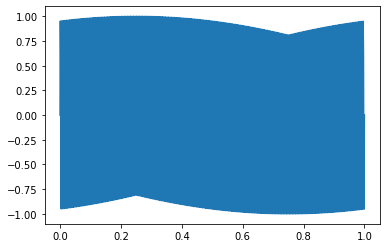

In [2]:
fs = 1000
nyquist = fs/2
frequency = 200
time_axis = np.linspace(0, 1, fs, endpoint=True)
signal_array = np.sin((time_axis * 2 * np.pi) * frequency)

plt.plot(time_axis, signal_array)
plt.show()

In [3]:
def zeroPadding(xn, m):
    N = len(xn)
    output_data = np.zeros(m * N,dtype=xn.dtype)
    output_data[::m] = xn
    return output_data

def interpolation_filter(xn, m, nyquist, fs):
    t = np.linspace(-nyquist, nyquist, m*fs)
    window = signal.windows.hamming(m*fs)
    sinc = np.sinc(t)
    output_data = signal.lfilter(sinc*window, 1, signal_array_zp)
    return window, sinc, output_data

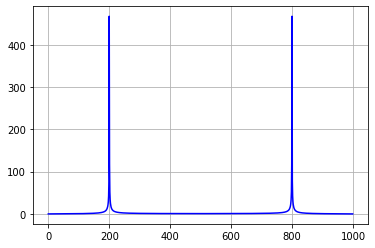

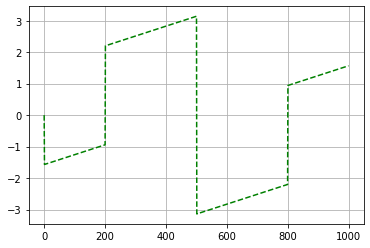

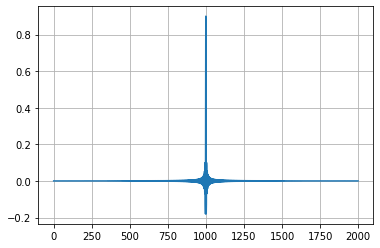

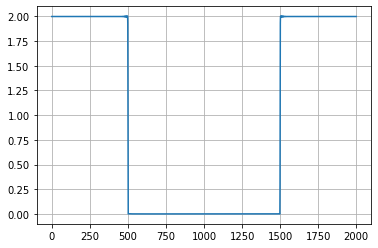

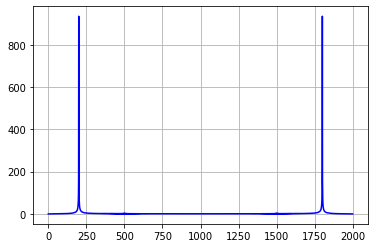

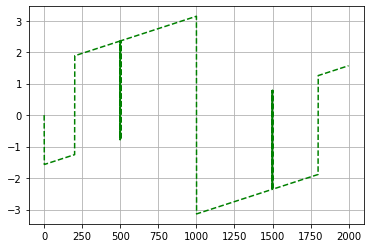

In [4]:
m = 2
# insert m-1 zeros between original signal
signal_array_zp = zeroPadding(signal_array, m)

# applied a interpolation filter and window(to prevent spikes close the nyquist) to zero padded signal 
win, sinc, signal_array_os = interpolation_filter(signal_array_zp, m, nyquist, fs)

# the product of interpolation filter will create 0 in first half array
# so we need to reverse & inverse the second half data as the first half
first_half = signal_array_os[::-1]*-1
signal_array_os[:fs] = first_half[:fs]

plt.figure(1)
plt.plot(np.abs(np.fft.fft(signal_array)),'b')
plt.grid()

plt.figure(2)
plt.plot(np.angle(np.fft.fft(signal_array)),'g--')
plt.grid()

plt.figure(3)
plt.plot(sinc*win)
plt.grid()

plt.figure(4)
plt.plot(np.abs(np.fft.fft(sinc*win)))
plt.grid()

plt.figure(5)
plt.plot(np.abs(np.fft.fft(signal_array_os)), 'b')
plt.grid()

plt.figure(6)
plt.plot(np.angle(np.fft.fft(signal_array_os)), 'g--')
plt.grid()

plt.show()